In [585]:
#!/usr/bin/env python

import numpy as np
import pandas as pd
import click as ck
from sklearn.metrics import classification_report
from sklearn.metrics.pairwise import cosine_similarity
import sys
from collections import deque
import time
import logging
from sklearn.metrics import roc_curve, auc, matthews_corrcoef
from scipy.spatial import distance
from scipy import sparse
import math
from utils import FUNC_DICT, Ontology, NAMESPACES
from matplotlib import pyplot as plt
pd.set_option('display.max_rows', 1000)

In [64]:
def get_numbers_subonolgies(sub_onology):
    for i in range (0,len(sub_onology)):
        print('No. preds scores',len(sub_onology['preds'].iloc[i]),'No. Annotations',len(sub_onology['hp_annotations'].iloc[i]),'for gene',sub_onology['genes'].iloc[i],'No. HP_preds',len(sub_onology['hp_preds'].iloc[i]))

# Over_all_function_extract _prediction

In [253]:
def get_predictions_HPO(predictions_organs,index,threshould_score):
    preds=(predictions_organs['preds'].iloc[index])
    hp_preds=(predictions_organs['hp_preds'].iloc[index])
    hp_preds_array=[]
    HPO_more_than_50_perc=[]

    for i in  ((hp_preds)):
        hp_preds_array.append(i)

    counter=0
    indeces=[]
    scores=[]
    for i in (preds):
        
        if i>threshould_score:
            indeces.append(counter)
            scores.append([i,counter])
        counter+=1
    counter=0
    ind=0
    scores_2=[]
    for hp in (hp_preds):
        
        if (counter in indeces ):
            HPO_more_than_50_perc.append(hp_preds_array[counter])
            scores_2.append([hp_preds_array[counter],counter])
            ind+=1
        counter+=1
    data_gene_V1 = pd.DataFrame(scores_2)
    data_gene_V1.head()
    data_gene_V1 = data_gene_V1.rename(columns={0: 'HP_prediction', 1: 'index'})
    data_gene_V2 = pd.DataFrame(scores)
    
    data_gene_V2 = data_gene_V2.rename(columns={0: 'prediction_score', 1: 'index'})
    df_combined_gene = data_gene_V1.merge(data_gene_V2, left_on='index', right_on='index', how='inner')
    return(df_combined_gene)

In [271]:
swissprot_version = pd.read_pickle('data/My_Implementations/swissprot_version.pkl')

swissprot_version.head()

,proteins,accessions,sequences,annotations,interpros,orgs,genes,gene_names,exp_annotations,iea_annotations
321,1433B_HUMAN,P31946; A8K9K2; E1P616;,MTMDKSELVQKAKLAEQAERYDDMAAAMKAVTEQGHELSNEERNLL...,"[GO:0005737|IDA, GO:0005829|IDA, GO:0070062|HD...","[IPR000308, IPR023409, IPR036815, IPR023410]",9606,7529,[YWHAB],"[GO:0008150, GO:0007006, GO:0035329, GO:000718...","[GO:0008150, GO:0007006, GO:0035329, GO:000718..."
338,1433E_HUMAN,P62258; B3KY71; D3DTH5; P29360; P42655; Q4VJB6...,MDDREDLVYQAKLAEQAERYDEMVESMKKVAGMDVELTVEERNLLS...,"[GO:0005623|IEA, GO:0090724|IEA, GO:0005737|ID...","[IPR000308, IPR023409, IPR036815, IPR023410]",9606,7531,[YWHAE],"[GO:0005261, GO:0043066, GO:0008150, GO:000700...","[GO:0005261, GO:0043066, GO:0008150, GO:000700..."
344,1433F_HUMAN,Q04917;,MGDREQLLQRARLAEQAERYDDMASAMKAVTELNEPLSNEDRNLLS...,"[GO:0005737|ISS, GO:0005829|TAS, GO:0070062|HD...","[IPR000308, IPR023409, IPR036815, IPR023410]",9606,7533,"[YWHAH, YWHA1]","[GO:0005261, GO:0086010, GO:0031958, GO:000815...","[GO:0005261, GO:0086010, GO:0051093, GO:000815..."
350,1433G_HUMAN,P61981; O70457; P35214; Q6FH52; Q9UDP2; Q9UN99;,MVDREQLVQKARLAEQAERYDDMAAAMKNVTELNEPLSNEERNLLS...,"[GO:0005829|TAS, GO:0070062|HDA, GO:0005925|HD...","[IPR000308, IPR023409, IPR036815, IPR023410]",9606,7532,[YWHAG],"[GO:0008150, GO:0007006, GO:0032501, GO:000701...","[GO:0008150, GO:0007006, GO:0032501, GO:000701..."
356,1433S_HUMAN,P31947; Q6FH30; Q6FH51; Q96DH0;,MERASLIQKAKLAEQAERYEDMAAFMKGAVEKGEELSCEERNLLSV...,"[GO:0005829|IDA, GO:0070062|HDA, GO:0005615|TA...","[IPR000308, IPR023409, IPR036815, IPR023410, I...",9606,2810,"[SFN, HME1]","[GO:0004860, GO:0043066, GO:0008150, GO:000700...","[GO:0043066, GO:0008150, GO:0007006, GO:003250..."


In [60]:
swissprot_version[swissprot_version['genes']=='65109']


,proteins,accessions,sequences,annotations,interpros,orgs,genes,gene_names,exp_annotations,iea_annotations
350158,REN3B_HUMAN,Q9BZI7; D3DWI3; D3DWI4; Q0VAK8; Q9H1J0;,MKEEKEHRPKEKRVTLLTPAGATGSGGGTSGDSSKGEDKQDRNKEK...,"[GO:0034451|IDA, GO:0005737|IBA, GO:0005829|ID...","[IPR012677, IPR035979, IPR039722, IPR005120, I...",9606,65109,"[UPF3B, RENT3B, UPF3X]","[GO:0008150, GO:0006414, GO:0031326, GO:004323...","[GO:0005198, GO:0008150, GO:0006414, GO:003132..."


In [61]:
swissprot_version[swissprot_version['genes']=='7368']


,proteins,accessions,sequences,annotations,interpros,orgs,genes,gene_names,exp_annotations,iea_annotations
61024,CGT_HUMAN,Q16880; B3KXU7; O00196;,MKSYTPYFILLWSAVGIAKAAKIIIVPPIMFESHMYIFKTLASALH...,"[GO:0016021|IEA, GO:0043231|IBA, GO:0005886|TA...","[IPR002213, IPR035595]",9606,7368,"[UGT8, CGT, UGT4]","[GO:0007399, GO:0006643, GO:0008150, GO:003250...","[GO:0007399, GO:0008150, GO:0010927, GO:004322..."


In [62]:
human = pd.read_pickle('data/My_Implementations/human.pkl')

human.head()

,genes,hp_annotations,go_annotations,iea_annotations,deepgo_annotations,sequences,expressions
0,8192,"{HP:0012443, HP:0000152, HP:0000359, HP:000000...","{GO:0004252, GO:0008152, GO:0051603, GO:004423...","{GO:0042623, GO:0008152, GO:0004252, GO:005160...","[GO:0000502|0.052, GO:0001539|0.035, GO:000367...",MWPGILVGGARVASCRYPALGPRLAAHFPAQRPPQRTLQNGLALQR...,"[0.19444445, 0.21296297, 0.23148148, 1.0, 0.46..."
1,2,"{HP:0000001, HP:0000006, HP:0000005}","{GO:0050794, GO:0030141, GO:0016050, GO:001717...","{GO:0050794, GO:0030141, GO:0016050, GO:001717...","[GO:0000003|0.189, GO:0000165|0.051, GO:000018...",MGKNKLLHPSLVLLLLVLLPTDASVSGKPQYMVLVPSLLHTETTEK...,"[0.015174977, 0.014245897, 0.03995045, 0.00061..."
2,8195,"{HP:0001374, HP:0000152, HP:0000175, HP:000913...","{GO:0051650, GO:0008104, GO:0070925, GO:000701...","{GO:0001707, GO:0007398, GO:0070925, GO:006063...","[GO:0000003|0.595, GO:0000226|0.861, GO:000110...",MSRLEAKKPSLCKSEPLTTERVRTTLSVLKRIVTSCYGPSGRLKQL...,"[0.5, 0.71428573, 0.39285713, 0.4642857, 0.428..."
3,8200,"{HP:0010745, HP:0000486, HP:0045008, HP:000176...","{GO:0051093, GO:0050794, GO:0010468, GO:007149...","{GO:0051093, GO:0035113, GO:0050794, GO:001046...","[GO:0000003|0.143, GO:0000122|0.069, GO:000016...",MRLPKLLTFLLWYLAWLDLEFICTVLGAPDLGQRPQGTRPGLAKAE...,"[0.0125, 0.025, 0.025, 0.025, 0.025, 0.0125, 0..."
4,90121,"{HP:0000152, HP:0000175, HP:0000079, HP:000040...",{},"{GO:0044085, GO:0034641, GO:0008152, GO:004225...","[GO:0000462|0.5, GO:0006139|0.545, GO:0006364|...",MAGAAEDARALFRAGVCAALEAWPALQIAVENGFGGVHSQEKAKWL...,"[0.62211984, 0.76958525, 1.0, 0.41013825, 0.36..."


In [67]:

predictions_max_Onset_40_perc = pd.read_pickle('data/My_Implementations/Trial_7/predictions_max_Onset_40_perc.pkl')
predictions_max_inheritance_40_perc = pd.read_pickle('data/My_Implementations/Trial_7/predictions_max_inheritance_40_perc.pkl')
predictions_organs_40_perc = pd.read_pickle('data/My_Implementations/Trial_7/predictions_organs_40_perc.pkl')


In [71]:
predictions_max_Onset = pd.read_pickle('data/My_Implementations/Trial_7/predictions_max_Onset.pkl')
predictions_max_inheritance = pd.read_pickle('data/My_Implementations/Trial_7/predictions_max_inheritance.pkl')
predictions_organs = pd.read_pickle('data/My_Implementations/predictions_organs.pkl')

In [72]:
get_numbers_subonolgies(predictions_max_inheritance_40_perc)

No. preds scores 2600 No. Annotations 176 for gene 284111 No. HP_preds 2
No. preds scores 2600 No. Annotations 40 for gene 7045 No. HP_preds 2
No. preds scores 2600 No. Annotations 306 for gene 8289 No. HP_preds 2
No. preds scores 2600 No. Annotations 112 for gene 7355 No. HP_preds 2
No. preds scores 2600 No. Annotations 261 for gene 8195 No. HP_preds 2
No. preds scores 2600 No. Annotations 28 for gene 353 No. HP_preds 2
No. preds scores 2600 No. Annotations 370 for gene 57167 No. HP_preds 2
No. preds scores 2600 No. Annotations 17 for gene 30009 No. HP_preds 2
No. preds scores 2600 No. Annotations 85 for gene 1644 No. HP_preds 2
No. preds scores 2600 No. Annotations 26 for gene 254394 No. HP_preds 2
No. preds scores 2600 No. Annotations 101 for gene 8893 No. HP_preds 2
No. preds scores 2600 No. Annotations 108 for gene 10342 No. HP_preds 2
No. preds scores 2600 No. Annotations 311 for gene 2253 No. HP_preds 2
No. preds scores 2600 No. Annotations 123 for gene 27445 No. HP_preds 2
No. 

No. preds scores 2600 No. Annotations 346 for gene 6299 No. HP_preds 2
No. preds scores 2600 No. Annotations 25 for gene 83938 No. HP_preds 2
No. preds scores 2600 No. Annotations 128 for gene 27125 No. HP_preds 2
No. preds scores 2600 No. Annotations 71 for gene 167691 No. HP_preds 2
No. preds scores 2600 No. Annotations 155 for gene 242 No. HP_preds 2
No. preds scores 2600 No. Annotations 276 for gene 2132 No. HP_preds 2
No. preds scores 2600 No. Annotations 166 for gene 1406 No. HP_preds 2
No. preds scores 2600 No. Annotations 251 for gene 175 No. HP_preds 2
No. preds scores 2600 No. Annotations 85 for gene 8812 No. HP_preds 2
No. preds scores 2600 No. Annotations 84 for gene 1021 No. HP_preds 2
No. preds scores 2600 No. Annotations 89 for gene 5336 No. HP_preds 2
No. preds scores 2600 No. Annotations 210 for gene 2255 No. HP_preds 2
No. preds scores 2600 No. Annotations 71 for gene 54919 No. HP_preds 2
No. preds scores 2600 No. Annotations 148 for gene 5309 No. HP_preds 2
No. preds

No. preds scores 2600 No. Annotations 43 for gene 3783 No. HP_preds 2
No. preds scores 2600 No. Annotations 36 for gene 23328 No. HP_preds 2
No. preds scores 2600 No. Annotations 247 for gene 2067 No. HP_preds 2
No. preds scores 2600 No. Annotations 34 for gene 6524 No. HP_preds 2
No. preds scores 2600 No. Annotations 92 for gene 387787 No. HP_preds 2
No. preds scores 2600 No. Annotations 95 for gene 710 No. HP_preds 2
No. preds scores 2600 No. Annotations 165 for gene 79577 No. HP_preds 2
No. preds scores 2600 No. Annotations 224 for gene 5449 No. HP_preds 2
No. preds scores 2600 No. Annotations 34 for gene 6144 No. HP_preds 2
No. preds scores 2600 No. Annotations 171 for gene 5052 No. HP_preds 2
No. preds scores 2600 No. Annotations 275 for gene 114548 No. HP_preds 2
No. preds scores 2600 No. Annotations 83 for gene 729238 No. HP_preds 2
No. preds scores 2600 No. Annotations 146 for gene 23529 No. HP_preds 2
No. preds scores 2600 No. Annotations 7 for gene 487 No. HP_preds 2
No. pred

In [53]:
get_numbers_subonolgies(predictions_max_inheritance)

No. preds scores 2600 No. Annotations 160 for gene 65109 No. HP_preds 2
No. preds scores 2600 No. Annotations 176 for gene 284111 No. HP_preds 2
No. preds scores 2600 No. Annotations 40 for gene 7045 No. HP_preds 2
No. preds scores 2600 No. Annotations 306 for gene 8289 No. HP_preds 2
No. preds scores 2600 No. Annotations 112 for gene 7355 No. HP_preds 2
No. preds scores 2600 No. Annotations 261 for gene 8195 No. HP_preds 2
No. preds scores 2600 No. Annotations 28 for gene 353 No. HP_preds 2
No. preds scores 2600 No. Annotations 370 for gene 57167 No. HP_preds 2
No. preds scores 2600 No. Annotations 17 for gene 30009 No. HP_preds 2
No. preds scores 2600 No. Annotations 85 for gene 1644 No. HP_preds 2
No. preds scores 2600 No. Annotations 26 for gene 254394 No. HP_preds 2
No. preds scores 2600 No. Annotations 101 for gene 8893 No. HP_preds 2
No. preds scores 2600 No. Annotations 108 for gene 10342 No. HP_preds 2
No. preds scores 2600 No. Annotations 311 for gene 2253 No. HP_preds 2
No. 

No. preds scores 2600 No. Annotations 110 for gene 7167 No. HP_preds 2
No. preds scores 2600 No. Annotations 3 for gene 1557 No. HP_preds 2
No. preds scores 2600 No. Annotations 286 for gene 10312 No. HP_preds 2
No. preds scores 2600 No. Annotations 89 for gene 123606 No. HP_preds 2
No. preds scores 2600 No. Annotations 112 for gene 4774 No. HP_preds 2
No. preds scores 2600 No. Annotations 172 for gene 390594 No. HP_preds 2
No. preds scores 2600 No. Annotations 150 for gene 2639 No. HP_preds 2
No. preds scores 2600 No. Annotations 231 for gene 617 No. HP_preds 2
No. preds scores 2600 No. Annotations 26 for gene 80739 No. HP_preds 2
No. preds scores 2600 No. Annotations 544 for gene 6899 No. HP_preds 2
No. preds scores 2600 No. Annotations 442 for gene 9469 No. HP_preds 2
No. preds scores 2600 No. Annotations 112 for gene 22907 No. HP_preds 2
No. preds scores 2600 No. Annotations 105 for gene 166785 No. HP_preds 2
No. preds scores 2600 No. Annotations 91 for gene 54938 No. HP_preds 2
No

No. preds scores 2600 No. Annotations 132 for gene 50939 No. HP_preds 2
No. preds scores 2600 No. Annotations 149 for gene 3737 No. HP_preds 2
No. preds scores 2600 No. Annotations 292 for gene 85358 No. HP_preds 2
No. preds scores 2600 No. Annotations 224 for gene 2516 No. HP_preds 2
No. preds scores 2600 No. Annotations 73 for gene 25914 No. HP_preds 2
No. preds scores 2600 No. Annotations 274 for gene 3643 No. HP_preds 2
No. preds scores 2600 No. Annotations 28 for gene 51142 No. HP_preds 2
No. preds scores 2600 No. Annotations 78 for gene 63924 No. HP_preds 2
No. preds scores 2600 No. Annotations 122 for gene 6911 No. HP_preds 2
No. preds scores 2600 No. Annotations 68 for gene 10397 No. HP_preds 2
No. preds scores 2600 No. Annotations 145 for gene 974 No. HP_preds 2
No. preds scores 2600 No. Annotations 94 for gene 63925 No. HP_preds 2
No. preds scores 2600 No. Annotations 182 for gene 2137 No. HP_preds 2


In [74]:
get_numbers_subonolgies(predictions_max_Onset_40_perc)

No. preds scores 2600 No. Annotations 176 for gene 284111 No. HP_preds 2
No. preds scores 2600 No. Annotations 40 for gene 7045 No. HP_preds 2
No. preds scores 2600 No. Annotations 306 for gene 8289 No. HP_preds 2
No. preds scores 2600 No. Annotations 112 for gene 7355 No. HP_preds 2
No. preds scores 2600 No. Annotations 261 for gene 8195 No. HP_preds 2
No. preds scores 2600 No. Annotations 28 for gene 353 No. HP_preds 2
No. preds scores 2600 No. Annotations 370 for gene 57167 No. HP_preds 2
No. preds scores 2600 No. Annotations 17 for gene 30009 No. HP_preds 2
No. preds scores 2600 No. Annotations 85 for gene 1644 No. HP_preds 2
No. preds scores 2600 No. Annotations 26 for gene 254394 No. HP_preds 2
No. preds scores 2600 No. Annotations 101 for gene 8893 No. HP_preds 2
No. preds scores 2600 No. Annotations 108 for gene 10342 No. HP_preds 2
No. preds scores 2600 No. Annotations 311 for gene 2253 No. HP_preds 2
No. preds scores 2600 No. Annotations 123 for gene 27445 No. HP_preds 2
No. 

No. preds scores 2600 No. Annotations 112 for gene 4774 No. HP_preds 2
No. preds scores 2600 No. Annotations 172 for gene 390594 No. HP_preds 2
No. preds scores 2600 No. Annotations 150 for gene 2639 No. HP_preds 2
No. preds scores 2600 No. Annotations 231 for gene 617 No. HP_preds 2
No. preds scores 2600 No. Annotations 26 for gene 80739 No. HP_preds 2
No. preds scores 2600 No. Annotations 544 for gene 6899 No. HP_preds 2
No. preds scores 2600 No. Annotations 442 for gene 9469 No. HP_preds 2
No. preds scores 2600 No. Annotations 112 for gene 22907 No. HP_preds 2
No. preds scores 2600 No. Annotations 105 for gene 166785 No. HP_preds 2
No. preds scores 2600 No. Annotations 91 for gene 54938 No. HP_preds 2
No. preds scores 2600 No. Annotations 115 for gene 5450 No. HP_preds 2
No. preds scores 2600 No. Annotations 9 for gene 3455 No. HP_preds 2
No. preds scores 2600 No. Annotations 334 for gene 26191 No. HP_preds 2
No. preds scores 2600 No. Annotations 143 for gene 23389 No. HP_preds 2
No

No. preds scores 2600 No. Annotations 274 for gene 3643 No. HP_preds 2
No. preds scores 2600 No. Annotations 28 for gene 51142 No. HP_preds 2
No. preds scores 2600 No. Annotations 78 for gene 63924 No. HP_preds 2
No. preds scores 2600 No. Annotations 122 for gene 6911 No. HP_preds 2
No. preds scores 2600 No. Annotations 68 for gene 10397 No. HP_preds 2
No. preds scores 2600 No. Annotations 145 for gene 974 No. HP_preds 2
No. preds scores 2600 No. Annotations 94 for gene 63925 No. HP_preds 2
No. preds scores 2600 No. Annotations 182 for gene 2137 No. HP_preds 2


In [54]:
get_numbers_subonolgies(predictions_max_Onset)

No. preds scores 2600 No. Annotations 160 for gene 65109 No. HP_preds 2
No. preds scores 2600 No. Annotations 176 for gene 284111 No. HP_preds 2
No. preds scores 2600 No. Annotations 40 for gene 7045 No. HP_preds 2
No. preds scores 2600 No. Annotations 306 for gene 8289 No. HP_preds 2
No. preds scores 2600 No. Annotations 112 for gene 7355 No. HP_preds 2
No. preds scores 2600 No. Annotations 261 for gene 8195 No. HP_preds 2
No. preds scores 2600 No. Annotations 28 for gene 353 No. HP_preds 2
No. preds scores 2600 No. Annotations 370 for gene 57167 No. HP_preds 2
No. preds scores 2600 No. Annotations 17 for gene 30009 No. HP_preds 2
No. preds scores 2600 No. Annotations 85 for gene 1644 No. HP_preds 2
No. preds scores 2600 No. Annotations 26 for gene 254394 No. HP_preds 2
No. preds scores 2600 No. Annotations 101 for gene 8893 No. HP_preds 2
No. preds scores 2600 No. Annotations 108 for gene 10342 No. HP_preds 2
No. preds scores 2600 No. Annotations 311 for gene 2253 No. HP_preds 2
No. 

No. preds scores 2600 No. Annotations 100 for gene 9181 No. HP_preds 2
No. preds scores 2600 No. Annotations 83 for gene 5859 No. HP_preds 2
No. preds scores 2600 No. Annotations 131 for gene 5087 No. HP_preds 2
No. preds scores 2600 No. Annotations 140 for gene 8869 No. HP_preds 2
No. preds scores 2600 No. Annotations 173 for gene 84892 No. HP_preds 2
No. preds scores 2600 No. Annotations 138 for gene 3559 No. HP_preds 2
No. preds scores 2600 No. Annotations 275 for gene 57688 No. HP_preds 2
No. preds scores 2600 No. Annotations 37 for gene 10456 No. HP_preds 2
No. preds scores 2600 No. Annotations 117 for gene 1259 No. HP_preds 2
No. preds scores 2600 No. Annotations 114 for gene 4141 No. HP_preds 2
No. preds scores 2600 No. Annotations 92 for gene 6603 No. HP_preds 2
No. preds scores 2600 No. Annotations 447 for gene 9968 No. HP_preds 2
No. preds scores 2600 No. Annotations 30 for gene 714 No. HP_preds 2
No. preds scores 2600 No. Annotations 257 for gene 129563 No. HP_preds 2
No. pr

No. preds scores 2600 No. Annotations 155 for gene 2799 No. HP_preds 2
No. preds scores 2600 No. Annotations 129 for gene 9895 No. HP_preds 2
No. preds scores 2600 No. Annotations 110 for gene 378884 No. HP_preds 2
No. preds scores 2600 No. Annotations 329 for gene 7170 No. HP_preds 2
No. preds scores 2600 No. Annotations 196 for gene 91179 No. HP_preds 2
No. preds scores 2600 No. Annotations 164 for gene 6578 No. HP_preds 2
No. preds scores 2600 No. Annotations 138 for gene 6904 No. HP_preds 2
No. preds scores 2600 No. Annotations 111 for gene 6878 No. HP_preds 2
No. preds scores 2600 No. Annotations 187 for gene 3909 No. HP_preds 2
No. preds scores 2600 No. Annotations 315 for gene 4998 No. HP_preds 2
No. preds scores 2600 No. Annotations 43 for gene 8604 No. HP_preds 2
No. preds scores 2600 No. Annotations 14 for gene 631 No. HP_preds 2
No. preds scores 2600 No. Annotations 123 for gene 2556 No. HP_preds 2
No. preds scores 2600 No. Annotations 139 for gene 4914 No. HP_preds 2
No. pr

In [73]:
get_numbers_subonolgies(predictions_organs_40_perc)

No. preds scores 2600 No. Annotations 176 for gene 284111 No. HP_preds 50
No. preds scores 2600 No. Annotations 40 for gene 7045 No. HP_preds 50
No. preds scores 2600 No. Annotations 306 for gene 8289 No. HP_preds 50
No. preds scores 2600 No. Annotations 112 for gene 7355 No. HP_preds 50
No. preds scores 2600 No. Annotations 261 for gene 8195 No. HP_preds 50
No. preds scores 2600 No. Annotations 28 for gene 353 No. HP_preds 50
No. preds scores 2600 No. Annotations 370 for gene 57167 No. HP_preds 50
No. preds scores 2600 No. Annotations 17 for gene 30009 No. HP_preds 50
No. preds scores 2600 No. Annotations 85 for gene 1644 No. HP_preds 50
No. preds scores 2600 No. Annotations 26 for gene 254394 No. HP_preds 50
No. preds scores 2600 No. Annotations 101 for gene 8893 No. HP_preds 50
No. preds scores 2600 No. Annotations 108 for gene 10342 No. HP_preds 50
No. preds scores 2600 No. Annotations 311 for gene 2253 No. HP_preds 50
No. preds scores 2600 No. Annotations 123 for gene 27445 No. HP

No. preds scores 2600 No. Annotations 32 for gene 3659 No. HP_preds 50
No. preds scores 2600 No. Annotations 201 for gene 10479 No. HP_preds 50
No. preds scores 2600 No. Annotations 24 for gene 116519 No. HP_preds 50
No. preds scores 2600 No. Annotations 73 for gene 84188 No. HP_preds 50
No. preds scores 2600 No. Annotations 443 for gene 9126 No. HP_preds 50
No. preds scores 2600 No. Annotations 15 for gene 2651 No. HP_preds 50
No. preds scores 2600 No. Annotations 70 for gene 3920 No. HP_preds 50
No. preds scores 2600 No. Annotations 307 for gene 51053 No. HP_preds 50
No. preds scores 2600 No. Annotations 94 for gene 9817 No. HP_preds 50
No. preds scores 2600 No. Annotations 29 for gene 8823 No. HP_preds 50
No. preds scores 2600 No. Annotations 43 for gene 6548 No. HP_preds 50
No. preds scores 2600 No. Annotations 144 for gene 788 No. HP_preds 50
No. preds scores 2600 No. Annotations 55 for gene 22901 No. HP_preds 50
No. preds scores 2600 No. Annotations 28 for gene 56479 No. HP_preds

No. preds scores 2600 No. Annotations 7 for gene 487 No. HP_preds 50
No. preds scores 2600 No. Annotations 157 for gene 84976 No. HP_preds 50
No. preds scores 2600 No. Annotations 318 for gene 5977 No. HP_preds 50
No. preds scores 2600 No. Annotations 333 for gene 5339 No. HP_preds 50
No. preds scores 2600 No. Annotations 185 for gene 56006 No. HP_preds 50
No. preds scores 2600 No. Annotations 94 for gene 5582 No. HP_preds 50
No. preds scores 2600 No. Annotations 448 for gene 57492 No. HP_preds 50
No. preds scores 2600 No. Annotations 55 for gene 5625 No. HP_preds 50
No. preds scores 2600 No. Annotations 32 for gene 57128 No. HP_preds 50
No. preds scores 2600 No. Annotations 122 for gene 10436 No. HP_preds 50
No. preds scores 2600 No. Annotations 22 for gene 115908 No. HP_preds 50
No. preds scores 2600 No. Annotations 271 for gene 2301 No. HP_preds 50
No. preds scores 2600 No. Annotations 25 for gene 721 No. HP_preds 50
No. preds scores 2600 No. Annotations 227 for gene 5831 No. HP_pre

In [55]:
get_numbers_subonolgies(predictions_organs)

No. preds scores 2600 No. Annotations 160 for gene 65109 No. HP_preds 50
No. preds scores 2600 No. Annotations 176 for gene 284111 No. HP_preds 50
No. preds scores 2600 No. Annotations 40 for gene 7045 No. HP_preds 50
No. preds scores 2600 No. Annotations 306 for gene 8289 No. HP_preds 50
No. preds scores 2600 No. Annotations 112 for gene 7355 No. HP_preds 50
No. preds scores 2600 No. Annotations 261 for gene 8195 No. HP_preds 50
No. preds scores 2600 No. Annotations 28 for gene 353 No. HP_preds 50
No. preds scores 2600 No. Annotations 370 for gene 57167 No. HP_preds 50
No. preds scores 2600 No. Annotations 17 for gene 30009 No. HP_preds 50
No. preds scores 2600 No. Annotations 85 for gene 1644 No. HP_preds 50
No. preds scores 2600 No. Annotations 26 for gene 254394 No. HP_preds 50
No. preds scores 2600 No. Annotations 101 for gene 8893 No. HP_preds 50
No. preds scores 2600 No. Annotations 108 for gene 10342 No. HP_preds 50
No. preds scores 2600 No. Annotations 311 for gene 2253 No. HP

No. preds scores 2600 No. Annotations 29 for gene 57055 No. HP_preds 50
No. preds scores 2600 No. Annotations 131 for gene 6445 No. HP_preds 50
No. preds scores 2600 No. Annotations 218 for gene 60675 No. HP_preds 50
No. preds scores 2600 No. Annotations 202 for gene 94 No. HP_preds 50
No. preds scores 2600 No. Annotations 66 for gene 25802 No. HP_preds 50
No. preds scores 2600 No. Annotations 391 for gene 51085 No. HP_preds 50
No. preds scores 2600 No. Annotations 112 for gene 57082 No. HP_preds 50
No. preds scores 2600 No. Annotations 49 for gene 164656 No. HP_preds 50
No. preds scores 2600 No. Annotations 213 for gene 1130 No. HP_preds 50
No. preds scores 2600 No. Annotations 8 for gene 79882 No. HP_preds 50
No. preds scores 2600 No. Annotations 115 for gene 7965 No. HP_preds 50
No. preds scores 2600 No. Annotations 71 for gene 54894 No. HP_preds 50
No. preds scores 2600 No. Annotations 86 for gene 91662 No. HP_preds 50
No. preds scores 2600 No. Annotations 149 for gene 4747 No. HP_

No. preds scores 2600 No. Annotations 138 for gene 4723 No. HP_preds 50
No. preds scores 2600 No. Annotations 20 for gene 54977 No. HP_preds 50
No. preds scores 2600 No. Annotations 10 for gene 23581 No. HP_preds 50
No. preds scores 2600 No. Annotations 84 for gene 57731 No. HP_preds 50
No. preds scores 2600 No. Annotations 127 for gene 4901 No. HP_preds 50
No. preds scores 2600 No. Annotations 22 for gene 10845 No. HP_preds 50
No. preds scores 2600 No. Annotations 19 for gene 4327 No. HP_preds 50
No. preds scores 2600 No. Annotations 164 for gene 10717 No. HP_preds 50
No. preds scores 2600 No. Annotations 10 for gene 102 No. HP_preds 50
No. preds scores 2600 No. Annotations 126 for gene 871 No. HP_preds 50
No. preds scores 2600 No. Annotations 59 for gene 54931 No. HP_preds 50
No. preds scores 2600 No. Annotations 14 for gene 1411 No. HP_preds 50
No. preds scores 2600 No. Annotations 148 for gene 54664 No. HP_preds 50
No. preds scores 2600 No. Annotations 340 for gene 10743 No. HP_pre

In [48]:
predictions_max_inheritance['genes'].unique()

array(['65109', '284111', '7045', '8289', '7355', '8195', '353', '57167',
       '30009', '1644', '254394', '8893', '10342', '2253', '27445',
       '22943', '1001', '7343', '1678', '51196', '3785', '29914', '7390',
       '3094', '6390', '1071', '4649', '6892', '2121', '2707', '22926',
       '55325', '2266', '8514', '57697', '200879', '3475', '51314',
       '1630', '79823', '4548', '471', '118429', '51660', '8694', '51807',
       '50640', '80347', '219736', '2539', '22866', '4990', '5696',
       '6309', '197135', '1798', '6310', '8738', '29926', '84059',
       '63910', '4683', '284058', '55958', '401024', '122553', '5903',
       '1616', '25782', '54888', '4522', '8516', '9496', '158866',
       '10300', '3758', '133686', '84720', '23639', '1629', '51124',
       '51626', '51204', '953', '10459', '23334', '55129', '2201', '767',
       '815', '220136', '79728', '4893', '2055', '8086', '164045',
       '79087', '2591', '8546', '551', '7007', '4784', '9419', '9215',
       '3340', 

In [49]:
predictions_max_inheritance[predictions_max_inheritance['genes']=='7368']

,genes,hp_annotations,go_annotations,iea_annotations,deepgo_annotations,sequences,expressions,preds,hp_preds


In [50]:
predictions_max_inheritance['preds'].iloc[0]

array([0.18848793, 0.03743096, 0.1480441 , ..., 0.00481877, 0.00399648,
       0.00594247], dtype=float32)

In [26]:
hp_annotations=(predictions_max_inheritance['hp_annotations'].iloc[0])
for i in (hp_annotations):
        print(i)

HP:0000152
HP:0002683
HP:0000768
HP:0000277
HP:0001626
HP:0000925
HP:0000924
HP:0002650
HP:0000098
HP:0000765
HP:0009121
HP:0000306
HP:0030680
HP:0001167
HP:0002814
HP:0002060
HP:0001627
HP:0001608
HP:0011220
HP:0000678
HP:0000275
HP:0000811
HP:0000322
HP:0000377
HP:0000035
HP:0000234
HP:0010993
HP:0000001
HP:0000163
HP:0000766
HP:0001631
HP:0000366
HP:0000767
HP:0000348
HP:0012639
HP:0000240
HP:0040194
HP:0001371
HP:0040064
HP:0000598
HP:0031816
HP:0012443
HP:0000005
HP:0011218
HP:0000174
HP:0001220
HP:0000774
HP:0000159
HP:0003011
HP:0009116
HP:0000752
HP:0012638
HP:0000709
HP:0100547
HP:0100729
HP:0011446
HP:0003121
HP:0000053
HP:0100807
HP:0000356
HP:0005257
HP:0003549
HP:0000288
HP:0001238
HP:0012243
HP:0000118
HP:0000303
HP:0001999
HP:0002011
HP:0000411
HP:0100753
HP:0011821
HP:0009122
HP:0009473
HP:0000708
HP:0011804
HP:0000218
HP:0010461
HP:0100261
HP:0000290
HP:0011994
HP:0000929
HP:0009810
HP:0000078
HP:0001760
HP:0100360
HP:0012385
HP:0007364
HP:0000119
HP:0003808
HP:0002167

In [274]:
predictions_max_Onset.iloc[0]

genes                                                             65109
hp_annotations        {HP:0000152, HP:0002683, HP:0000768, HP:000027...
go_annotations        {GO:0050794, GO:0010468, GO:0008104, GO:000661...
iea_annotations       {GO:0031967, GO:0050794, GO:0010468, GO:000810...
deepgo_annotations    [GO:0000184|0.563, GO:0000375|0.596, GO:000037...
sequences             MKEEKEHRPKEKRVTLLTPAGATGSGGGTSGDSSKGEDKQDRNKEK...
expressions           [0.2777778, 0.33333334, 0.2962963, 1.0, 0.2222...
preds                 [0.18848793, 0.037430957, 0.1480441, 0.0560620...
hp_preds                                       {HP:0003828, HP:0003812}
Name: 3800, dtype: object

In [275]:
preds_more_50_per_gene_65109_Onset=get_predictions_HPO(predictions_max_Onset,0,0.01)
preds_more_50_per_gene_65109_Onset

,HP_prediction,index,prediction_score
0,HP:0003828,0,0.188488
1,HP:0003812,1,0.037431


In [276]:
predictions_organs.iloc[0]

genes                                                             65109
hp_annotations        {HP:0000152, HP:0002683, HP:0000768, HP:000027...
go_annotations        {GO:0050794, GO:0010468, GO:0006611, GO:000810...
iea_annotations       {GO:0031967, GO:0050794, GO:0010468, GO:000661...
deepgo_annotations    [GO:0000184|0.563, GO:0000375|0.596, GO:000037...
sequences             MKEEKEHRPKEKRVTLLTPAGATGSGGGTSGDSSKGEDKQDRNKEK...
expressions           [0.2777778, 0.33333334, 0.2962963, 1.0, 0.2222...
preds                 [0.18848793, 0.037430957, 0.1480441, 0.0560620...
hp_preds              {HP:0012443, HP:0011747, HP:0000870, HP:001276...
Name: 3800, dtype: object

In [404]:
preds_more_50_per_gene_65109_organs=get_predictions_HPO(predictions_organs,0,0)
preds_more_50_per_gene_65109_organs

,HP_prediction,index,prediction_score
0,HP:0012443,0,0.188488
1,HP:0011747,1,0.037431
2,HP:0000870,2,0.148044
3,HP:0012762,3,0.056062
4,HP:0008232,4,0.499965
5,HP:0010514,5,0.937804
6,HP:0012823,6,0.137619
7,HP:0012638,7,0.592091
8,HP:0007367,8,0.244194
9,HP:0000830,9,0.185892


In [279]:
(predictions_max_inheritance.iloc[0])

genes                                                             65109
hp_annotations        {HP:0000152, HP:0002683, HP:0000768, HP:000027...
go_annotations        {GO:0050794, GO:0010468, GO:0008104, GO:000661...
iea_annotations       {GO:0031967, GO:0050794, GO:0010468, GO:000810...
deepgo_annotations    [GO:0000184|0.563, GO:0000375|0.596, GO:000037...
sequences             MKEEKEHRPKEKRVTLLTPAGATGSGGGTSGDSSKGEDKQDRNKEK...
expressions           [0.2777778, 0.33333334, 0.2962963, 1.0, 0.2222...
preds                 [0.18848793, 0.037430957, 0.1480441, 0.0560620...
hp_preds                                       {HP:0000007, HP:0000006}
Name: 3800, dtype: object

In [280]:
preds_more_50_per_gene_65109_inheritance=get_predictions_HPO(predictions_max_inheritance,0,0)
preds_more_50_per_gene_65109_inheritance

,HP_prediction,index,prediction_score
0,HP:0000007,0,0.188488
1,HP:0000006,1,0.037431


In [378]:
def read_txt_to_pandas(file_path):
    import csv
    data=[]
    with open (file_path, 'r') as f:
        for row in csv.reader(f,delimiter='\n'):
    #         print(row[0])
    #         print('-------------')
            data.append(row[0])
    result=[]
    string=data[0]
    for i in range(1,len(data)):
        result.append(data[i].split('\t'))


    dataa=pd.DataFrame(result)

    return (dataa,columns_names)

In [382]:
file_path='data/genes_to_phenotype_10_2021.txt'
data_10_2021=read_txt_to_pandas(file_path)

In [383]:
data_10_2021.head()

,0,1,2,3,4,5,6,7,8
0,8192,CLPP,HP:0004322,Short stature,-,HP:0040283,-,mim2gene,OMIM:614129
1,8192,CLPP,HP:0001250,Seizure,-,HP:0040283,-,mim2gene,OMIM:614129
2,8192,CLPP,HP:0000786,Primary amenorrhea,-,,-,mim2gene,OMIM:614129
3,8192,CLPP,HP:0000252,Microcephaly,-,HP:0040283,-,mim2gene,OMIM:614129
4,8192,CLPP,HP:0008527,Congenital sensorineural hearing impairment,-,,-,mim2gene,OMIM:614129


In [395]:
string='entrez-gene-id<tab>entrez-gene-symbol<tab>HPO-Term-ID<tab>HPO-Term-Name<tab>Frequency-Raw<tab>Frequency-HPO<tab>Additional Info from G-D source<tab>G-D source<tab>disease-ID for link'
columns_names=string.split('<tab>')
data_10_2021 = data_10_2021.rename(columns={0: columns_names[0], 
                                                1: columns_names[1],
                                                2: columns_names[2],
                                                3: columns_names[3],
                                               4: columns_names[4],
                                               5: columns_names[5],
                                               6: columns_names[6],
                                               7: columns_names[7],
                                               8: columns_names[8],})

In [401]:
result_gene_65109_10_2021=data_10_2021[data_10_2021['entrez-gene-id']=='65109']
result_gene_65109_10_2021

,entrez-gene-id,entrez-gene-symbol,HPO-Term-ID,HPO-Term-Name,Frequency-Raw,Frequency-HPO,Additional Info from G-D source,G-D source,disease-ID for link
246808,65109,UPF3B,HP:0000218,High palate,-,HP:0040281,,orphadata,ORPHA:776
246809,65109,UPF3B,HP:0001519,Disproportionate tall stature,-,HP:0040281,,orphadata,ORPHA:776
246810,65109,UPF3B,HP:0002650,Scoliosis,-,HP:0040281,,orphadata,ORPHA:776
246811,65109,UPF3B,HP:0000426,Prominent nasal bridge,-,HP:0040282,,orphadata,ORPHA:776
246812,65109,UPF3B,HP:0007370,Aplasia/Hypoplasia of the corpus callosum,-,HP:0040282,,orphadata,ORPHA:776
...,...,...,...,...,...,...,...,...,...
246894,65109,UPF3B,HP:0011220,Prominent forehead,-,HP:0040284,-,mim2gene,OMIM:300676
246895,65109,UPF3B,HP:0000218,High palate,-,HP:0040284,-,mim2gene,OMIM:300676
246896,65109,UPF3B,HP:0012450,Chronic constipation,-,HP:0040284,-,mim2gene,OMIM:300676
246897,65109,UPF3B,HP:0000275,Narrow face,-,HP:0040284,-,mim2gene,OMIM:300676


In [386]:
file_path='data/ALL_SOURCES_ALL_FREQUENCIES_genes_to_phenotype.txt'
data_6_2019=read_txt_to_pandas(file_path)

In [393]:
    
string='entrez-gene-id<tab>entrez-gene-symbol<tab>HPO-Term-Name<tab>HPO-Term-ID'
columns_names=string.split('<tab>')
columns_names
data_6_2019 = data_6_2019.rename(columns={0: columns_names[0], 
                                                1: columns_names[1],
                                                2: columns_names[2],
                                                3: columns_names[3],})

In [400]:
result_gene_65109_6_2019=data_6_2019[data_6_2019['entrez-gene-id']=='65109']
result_gene_65109_6_2019

,entrez-gene-id,entrez-gene-symbol,HPO-Term-Name,HPO-Term-ID
146754,65109,UPF3B,Pectus carinatum,HP:0000768
146755,65109,UPF3B,Macrocephaly,HP:0000256
146756,65109,UPF3B,Short philtrum,HP:0000322
146757,65109,UPF3B,Abnormality of the musculature,HP:0003011
146758,65109,UPF3B,Brachydactyly,HP:0001156
146759,65109,UPF3B,Psychosis,HP:0000709
146760,65109,UPF3B,Narrow chest,HP:0000774
146761,65109,UPF3B,Hypoplasia of the maxilla,HP:0000327
146762,65109,UPF3B,Aplasia/Hypoplasia of the corpus callosum,HP:0007370
146763,65109,UPF3B,X-linked recessive inheritance,HP:0001419


In [403]:
len(result_gene_65109_10_2021),len(result_gene_65109_6_2019)

(91, 42)

,HP_prediction,index,prediction_score
0,HP:0012443,0,0.188488
1,HP:0011747,1,0.037431
2,HP:0000870,2,0.148044
3,HP:0012762,3,0.056062
4,HP:0008232,4,0.499965
5,HP:0010514,5,0.937804
6,HP:0012823,6,0.137619
7,HP:0012638,7,0.592091
8,HP:0007367,8,0.244194
9,HP:0000830,9,0.185892


In [406]:
df_preds= pd.concat([preds_more_50_per_gene_65109_Onset,
               preds_more_50_per_gene_65109_organs,
               preds_more_50_per_gene_65109_inheritance],ignore_index=True)
df_preds

,HP_prediction,index,prediction_score
0,HP:0003828,0,0.188488
1,HP:0003812,1,0.037431
2,HP:0012443,0,0.188488
3,HP:0011747,1,0.037431
4,HP:0000870,2,0.148044
5,HP:0012762,3,0.056062
6,HP:0008232,4,0.499965
7,HP:0010514,5,0.937804
8,HP:0012823,6,0.137619
9,HP:0012638,7,0.592091


In [407]:
result_gene_65109_10_2021

,entrez-gene-id,entrez-gene-symbol,HPO-Term-ID,HPO-Term-Name,Frequency-Raw,Frequency-HPO,Additional Info from G-D source,G-D source,disease-ID for link
246808,65109,UPF3B,HP:0000218,High palate,-,HP:0040281,,orphadata,ORPHA:776
246809,65109,UPF3B,HP:0001519,Disproportionate tall stature,-,HP:0040281,,orphadata,ORPHA:776
246810,65109,UPF3B,HP:0002650,Scoliosis,-,HP:0040281,,orphadata,ORPHA:776
246811,65109,UPF3B,HP:0000426,Prominent nasal bridge,-,HP:0040282,,orphadata,ORPHA:776
246812,65109,UPF3B,HP:0007370,Aplasia/Hypoplasia of the corpus callosum,-,HP:0040282,,orphadata,ORPHA:776
...,...,...,...,...,...,...,...,...,...
246894,65109,UPF3B,HP:0011220,Prominent forehead,-,HP:0040284,-,mim2gene,OMIM:300676
246895,65109,UPF3B,HP:0000218,High palate,-,HP:0040284,-,mim2gene,OMIM:300676
246896,65109,UPF3B,HP:0012450,Chronic constipation,-,HP:0040284,-,mim2gene,OMIM:300676
246897,65109,UPF3B,HP:0000275,Narrow face,-,HP:0040284,-,mim2gene,OMIM:300676


In [419]:
prediction_outcome = result_gene_65109_10_2021.merge(df_preds, left_on='HPO-Term-ID', right_on='HP_prediction', how='inner')
prediction_outcome

,entrez-gene-id,entrez-gene-symbol,HPO-Term-ID,HPO-Term-Name,Frequency-Raw,Frequency-HPO,Additional Info from G-D source,G-D source,disease-ID for link,HP_prediction,index,prediction_score


In [421]:
print(len(prediction_outcome))

0


In [ ]:
preds_oragans=get_predictions_HPO(predictions_organs,i,0)

In [411]:
predictions_organs.columns

Index(['genes', 'hp_annotations', 'go_annotations', 'iea_annotations',
       'deepgo_annotations', 'sequences', 'expressions', 'preds', 'hp_preds'],
      dtype='object')

In [415]:
# for i in range (0,len(predictions_organs['genes'])):
#                 print(predictions_organs['genes'].iloc[i])
#                 print('---------------')

In [444]:
genes=[]
HPO_Term_ID=[]
result=[]
outcomes=pd.DataFrame()
for i in range (0,len(predictions_organs)):
    preds_oragans=get_predictions_HPO(predictions_organs,i,0)
    gene=predictions_organs['genes'].iloc[i]
    result_gene_X_10_2021=data_10_2021[data_10_2021['entrez-gene-id']==gene]
    prediction_outcome = result_gene_X_10_2021.merge(df_preds, left_on='HPO-Term-ID', right_on='HP_prediction', how='inner')
    if len(prediction_outcome)>0:
        outcomes=pd.concat([prediction_outcome,outcomes],ignore_index=True)
        result.append([gene,prediction_outcome['HPO-Term-ID']])
        HPO_Term_ID.append(prediction_outcome['HPO-Term-ID'])
        genes.append(gene)

In [ ]:
result
HPO_Term_ID

In [453]:
HPO_Term_ID[0]

0    HP:0012444
1    HP:0002500
2    HP:0000007
3    HP:0001273
4    HP:0002059
Name: HPO-Term-ID, dtype: object

In [459]:
result[0][1]

0    HP:0012444
1    HP:0002500
2    HP:0000007
3    HP:0001273
4    HP:0002059
Name: HPO-Term-ID, dtype: object

In [455]:
result

[['284111', 0    HP:0012444
  1    HP:0002500
  2    HP:0000007
  3    HP:0001273
  4    HP:0002059
  Name: HPO-Term-ID, dtype: object], ['7045', 0    HP:0000006
  1    HP:0000006
  2    HP:0000006
  3    HP:0000006
  4    HP:0000006
  5    HP:0000006
  6    HP:0000006
  Name: HPO-Term-ID, dtype: object], ['8289', 0    HP:0001273
  1    HP:0000006
  Name: HPO-Term-ID, dtype: object], ['7355', 0    HP:0002059
  1    HP:0002059
  2    HP:0002418
  3    HP:0012762
  4    HP:0002925
  Name: HPO-Term-ID, dtype: object], ['8195', 0    HP:0000007
  1    HP:0000007
  Name: HPO-Term-ID, dtype: object], ['353', 0    HP:0000007
  Name: HPO-Term-ID, dtype: object], ['57167', 0    HP:0000006
  1    HP:0000006
  Name: HPO-Term-ID, dtype: object], ['30009', 0    HP:0000007
  Name: HPO-Term-ID, dtype: object], ['1644', 0    HP:0000007
  Name: HPO-Term-ID, dtype: object], ['254394', 0    HP:0000007
  Name: HPO-Term-ID, dtype: object], ['8893', 0    HP:0002352
  1    HP:0002171
  2    HP:0000007
  Name:

In [445]:
genes

['284111',
 '7045',
 '8289',
 '7355',
 '8195',
 '353',
 '57167',
 '30009',
 '1644',
 '254394',
 '8893',
 '10342',
 '2253',
 '27445',
 '1001',
 '7343',
 '51196',
 '3785',
 '29914',
 '7390',
 '3094',
 '6390',
 '1071',
 '4649',
 '6892',
 '2121',
 '2707',
 '22926',
 '55325',
 '2266',
 '8514',
 '57697',
 '200879',
 '51314',
 '1630',
 '4548',
 '471',
 '118429',
 '51660',
 '8694',
 '50640',
 '80347',
 '22866',
 '4990',
 '5696',
 '6309',
 '197135',
 '1798',
 '6310',
 '8738',
 '29926',
 '84059',
 '63910',
 '4683',
 '284058',
 '401024',
 '122553',
 '5903',
 '25782',
 '54888',
 '4522',
 '8516',
 '9496',
 '10300',
 '3758',
 '133686',
 '84720',
 '23639',
 '1629',
 '51124',
 '51626',
 '51204',
 '953',
 '10459',
 '23334',
 '55129',
 '2201',
 '767',
 '815',
 '220136',
 '79728',
 '4893',
 '2055',
 '8086',
 '164045',
 '79087',
 '2591',
 '8546',
 '551',
 '7007',
 '4784',
 '9419',
 '9215',
 '3340',
 '54187',
 '79659',
 '7054',
 '3674',
 '658',
 '7201',
 '2050',
 '80217',
 '9780',
 '84233',
 '191',
 '5269'

In [446]:
outcomes

,entrez-gene-id,entrez-gene-symbol,HPO-Term-ID,HPO-Term-Name,Frequency-Raw,Frequency-HPO,Additional Info from G-D source,G-D source,disease-ID for link,HP_prediction,index,prediction_score
0,2137,EXTL3,HP:0000007,Autosomal recessive inheritance,-,,-,mim2gene,OMIM:617425,HP:0000007,0,0.188488
1,63925,ZNF335,HP:0012444,Brain atrophy,-,HP:0040281,,orphadata,ORPHA:329228,HP:0012444,30,0.370051
2,63925,ZNF335,HP:0002171,Gliosis,-,,-,mim2gene,OMIM:615095,HP:0002171,41,0.304857
3,63925,ZNF335,HP:0002059,Cerebral atrophy,-,,-,mim2gene,OMIM:615095,HP:0002059,35,0.015312
4,63925,ZNF335,HP:0000007,Autosomal recessive inheritance,-,,-,mim2gene,OMIM:615095,HP:0000007,0,0.188488
...,...,...,...,...,...,...,...,...,...,...,...,...
777,284111,SLC13A5,HP:0012444,Brain atrophy,-,HP:0040283,,orphadata,ORPHA:3006,HP:0012444,30,0.370051
778,284111,SLC13A5,HP:0002500,Abnormal cerebral white matter morphology,-,,-,mim2gene,OMIM:615905,HP:0002500,32,0.998923
779,284111,SLC13A5,HP:0000007,Autosomal recessive inheritance,-,,-,mim2gene,OMIM:615905,HP:0000007,0,0.188488
780,284111,SLC13A5,HP:0001273,Abnormal corpus callosum morphology,-,HP:0040283,,orphadata,ORPHA:442835,HP:0001273,20,0.583308


In [568]:
filtring=outcomes[outcomes['entrez-gene-id']=='284111']
filtring.head()

,entrez-gene-id,entrez-gene-symbol,HPO-Term-ID,HPO-Term-Name,Frequency-Raw,Frequency-HPO,Additional Info from G-D source,G-D source,disease-ID for link,HP_prediction,index,prediction_score
777,284111,SLC13A5,HP:0012444,Brain atrophy,-,HP:0040283,,orphadata,ORPHA:3006,HP:0012444,30,0.370051
778,284111,SLC13A5,HP:0002500,Abnormal cerebral white matter morphology,-,,-,mim2gene,OMIM:615905,HP:0002500,32,0.998923
779,284111,SLC13A5,HP:0000007,Autosomal recessive inheritance,-,,-,mim2gene,OMIM:615905,HP:0000007,0,0.188488
780,284111,SLC13A5,HP:0001273,Abnormal corpus callosum morphology,-,HP:0040283,,orphadata,ORPHA:442835,HP:0001273,20,0.583308
781,284111,SLC13A5,HP:0002059,Cerebral atrophy,-,HP:0040283,,orphadata,ORPHA:442835,HP:0002059,35,0.015312


In [567]:
Genes=outcomes['entrez-gene-id'].unique()
len(Genes)

362

In [565]:
outcomes.to_excel('outcomes.xlsx',index=False,encoding='utf-8')

In [659]:
outcomes[outcomes['entrez-gene-id']=='2137']


,entrez-gene-id,entrez-gene-symbol,HPO-Term-ID,HPO-Term-Name,Frequency-Raw,Frequency-HPO,Additional Info from G-D source,G-D source,disease-ID for link,HP_prediction,index,prediction_score
0,2137,EXTL3,HP:0000007,Autosomal recessive inheritance,-,,-,mim2gene,OMIM:617425,HP:0000007,0,0.188488


In [652]:
len(outcomes)

782

In [655]:
outcomes_clean=outcomes.copy()

In [654]:
len(outcomes.drop_duplicates(subset="HP_prediction"))

30

In [656]:
outcomes_clean=outcomes_clean.drop_duplicates(subset="HP_prediction")
outcomes_clean

,entrez-gene-id,entrez-gene-symbol,HPO-Term-ID,HPO-Term-Name,Frequency-Raw,Frequency-HPO,Additional Info from G-D source,G-D source,disease-ID for link,HP_prediction,index,prediction_score
0,2137,EXTL3,HP:0000007,Autosomal recessive inheritance,-,,-,mim2gene,OMIM:617425,HP:0000007,0,0.188488
1,63925,ZNF335,HP:0012444,Brain atrophy,-,HP:0040281,,orphadata,ORPHA:329228,HP:0012444,30,0.370051
2,63925,ZNF335,HP:0002171,Gliosis,-,,-,mim2gene,OMIM:615095,HP:0002171,41,0.304857
3,63925,ZNF335,HP:0002059,Cerebral atrophy,-,,-,mim2gene,OMIM:615095,HP:0002059,35,0.015312
8,6911,TBX6,HP:0000006,Autosomal dominant inheritance,-,,-,mim2gene,OMIM:122600,HP:0000006,1,0.037431
14,25914,RTTN,HP:0006870,Lobar holoprosencephaly,-,HP:0040283,,orphadata,ORPHA:468631,HP:0006870,24,0.185744
19,2516,NR5A1,HP:0008232,Elevated circulating follicle stimulating horm...,-,HP:0040284,-,mim2gene,OMIM:612965,HP:0008232,4,0.499965
22,2516,NR5A1,HP:0000837,Increased circulating gonadotropin level,-,HP:0040281,,orphadata,ORPHA:243,HP:0000837,22,0.511000
27,3737,KCNA2,HP:0001273,Abnormal corpus callosum morphology,-,HP:0040283,,orphadata,ORPHA:442835,HP:0001273,20,0.583308
34,4598,MVK,HP:0002120,Cerebral cortical atrophy,-,HP:0040281,,orphadata,ORPHA:29,HP:0002120,14,0.254874


In [677]:
outcomes_clean[outcomes_clean['entrez-gene-id']=='2137']


,entrez-gene-id,entrez-gene-symbol,HPO-Term-ID,HPO-Term-Name,Frequency-Raw,Frequency-HPO,Additional Info from G-D source,G-D source,disease-ID for link,HP_prediction,index,prediction_score
0,2137,EXTL3,HP:0000007,Autosomal recessive inheritance,-,,-,mim2gene,OMIM:617425,HP:0000007,0,0.188488


In [686]:
# Genes_names=[]
HPO_Annots_in=[]
HPO_Annots_out=[]
HPO_Annots=[]
for i in range (0,len(Genes)):
    filtring=outcomes[outcomes['entrez-gene-id']==Genes[i]]
    print(Genes[i],len(filtring))
    print()
#     for i in range (0,len(filtring)):
    print((filtring['HP_prediction']))

    HPO_Annots_out.append([Genes[i],filtring['HP_prediction']])
    HPO_Annots=[]
    print('---------------------------------------')
    

2137 1

0    HP:0000007
Name: HP_prediction, dtype: object
---------------------------------------
63925 4

1    HP:0012444
2    HP:0002171
3    HP:0002059
4    HP:0000007
Name: HP_prediction, dtype: object
---------------------------------------
974 1

5    HP:0000007
Name: HP_prediction, dtype: object
---------------------------------------
10397 1

6    HP:0000007
Name: HP_prediction, dtype: object
---------------------------------------
6911 2

7    HP:0000007
8    HP:0000006
Name: HP_prediction, dtype: object
---------------------------------------
63924 1

9    HP:0000007
Name: HP_prediction, dtype: object
---------------------------------------
51142 1

10    HP:0000006
Name: HP_prediction, dtype: object
---------------------------------------
3643 3

11    HP:0000006
12    HP:0000007
13    HP:0000007
Name: HP_prediction, dtype: object
---------------------------------------
25914 3

14    HP:0006870
15    HP:0002059
16    HP:0000007
Name: HP_prediction, dtype: object
----------


275    HP:0000007
Name: HP_prediction, dtype: object
---------------------------------------
10283 2

276    HP:0000007
277    HP:0002120
Name: HP_prediction, dtype: object
---------------------------------------
79628 2

278    HP:0000007
279    HP:0000006
Name: HP_prediction, dtype: object
---------------------------------------
129880 1

280    HP:0000007
Name: HP_prediction, dtype: object
---------------------------------------
64218 4

281    HP:0000007
282    HP:0000007
283    HP:0000006
284    HP:0002893
Name: HP_prediction, dtype: object
---------------------------------------
54344 2

285    HP:0000007
286    HP:0000007
Name: HP_prediction, dtype: object
---------------------------------------
55640 1

287    HP:0000007
Name: HP_prediction, dtype: object
---------------------------------------
4000 14

288    HP:0000006
289    HP:0000006
290    HP:0000006
291    HP:0000006
292    HP:0000006
293    HP:0000006
294    HP:0000006
295    HP:0003828
296    HP:0003828
297    HP:0000

481    HP:0000006
482    HP:0000006
483    HP:0000006
484    HP:0000007
Name: HP_prediction, dtype: object
---------------------------------------
79955 5

485    HP:0000007
486    HP:0000007
487    HP:0000007
488    HP:0000007
489    HP:0002120
Name: HP_prediction, dtype: object
---------------------------------------
84987 1

490    HP:0000007
Name: HP_prediction, dtype: object
---------------------------------------
115948 1

491    HP:0000007
Name: HP_prediction, dtype: object
---------------------------------------
4284 1

492    HP:0000006
Name: HP_prediction, dtype: object
---------------------------------------
8270 1

493    HP:0002059
Name: HP_prediction, dtype: object
---------------------------------------
126328 3

494    HP:0012444
495    HP:0000007
496    HP:0002352
Name: HP_prediction, dtype: object
---------------------------------------
2530 1

497    HP:0000007
Name: HP_prediction, dtype: object
---------------------------------------
8818 3

498    HP:0000007
499   

669    HP:0000006
Name: HP_prediction, dtype: object
---------------------------------------
1798 4

670    HP:0002120
671    HP:0000007
672    HP:0000007
673    HP:0003828
Name: HP_prediction, dtype: object
---------------------------------------
197135 1

674    HP:0000007
Name: HP_prediction, dtype: object
---------------------------------------
6309 2

675    HP:0000007
676    HP:0002059
Name: HP_prediction, dtype: object
---------------------------------------
5696 2

677    HP:0000007
678    HP:0002925
Name: HP_prediction, dtype: object
---------------------------------------
4990 2

679    HP:0000006
680    HP:0000007
Name: HP_prediction, dtype: object
---------------------------------------
22866 3

681    HP:0002120
682    HP:0001273
683    HP:0002059
Name: HP_prediction, dtype: object
---------------------------------------
80347 4

684    HP:0000722
685    HP:0000722
686    HP:0000007
687    HP:0000007
Name: HP_prediction, dtype: object
--------------------------------------

In [695]:
HPO_Annots_out[1]

['63925', 1    HP:0012444
 2    HP:0002171
 3    HP:0002059
 4    HP:0000007
 Name: HP_prediction, dtype: object]

In [694]:
HPO_Annots_out[1][1]

1    HP:0012444
2    HP:0002171
3    HP:0002059
4    HP:0000007
Name: HP_prediction, dtype: object

In [696]:
copy_HPO_Annots_out=HPO_Annots_out

In [ ]:
for i in range (len(HPO_Annots_out)):
    HPO_Annots_out[i][1]=set(HPO_Annots_out[i][1])
    print()

In [698]:
HPO_Annots_out

[['2137', {'HP:0000007'}],
 ['63925', {'HP:0000007', 'HP:0002059', 'HP:0002171', 'HP:0012444'}],
 ['974', {'HP:0000007'}],
 ['10397', {'HP:0000007'}],
 ['6911', {'HP:0000006', 'HP:0000007'}],
 ['63924', {'HP:0000007'}],
 ['51142', {'HP:0000006'}],
 ['3643', {'HP:0000006', 'HP:0000007'}],
 ['25914', {'HP:0000007', 'HP:0002059', 'HP:0006870'}],
 ['2516', {'HP:0000006', 'HP:0000837', 'HP:0008232'}],
 ['85358', {'HP:0000006'}],
 ['3737', {'HP:0000006', 'HP:0001273', 'HP:0002059'}],
 ['50939', {'HP:0000006', 'HP:0000007'}],
 ['1889', {'HP:0000006'}],
 ['4598', {'HP:0000006', 'HP:0000007', 'HP:0002059', 'HP:0002120'}],
 ['5261', {'HP:0000007'}],
 ['57410', {'HP:0000007'}],
 ['259236', {'HP:0000007'}],
 ['23387', {'HP:0000007'}],
 ['4914', {'HP:0000007'}],
 ['631', {'HP:0000006', 'HP:0000007'}],
 ['8604', {'HP:0000007'}],
 ['4998', {'HP:0000007'}],
 ['3909', {'HP:0000007'}],
 ['6878', {'HP:0000007'}],
 ['6904', {'HP:0000007', 'HP:0002120', 'HP:0002171'}],
 ['6578', {'HP:0000006', 'HP:0000007'

In [699]:
HPO_Annots_out_DF=pd.DataFrame(HPO_Annots_out)

In [700]:

HPO_Annots_out_DF = HPO_Annots_out_DF.rename(columns={0: 'Gene_Name',1:'annotated_HPO'})
HPO_Annots_out_DF['annotated_HPO'].iloc[1]

{'HP:0000007', 'HP:0002059', 'HP:0002171', 'HP:0012444'}

In [701]:
HPO_Annots_out_DF['length']=len(HPO_Annots_out_DF['annotated_HPO'])
for i in range(0,len(HPO_Annots_out_DF)):
    HPO_Annots_out_DF['length'].iloc[i]=len(HPO_Annots_out_DF['annotated_HPO'].iloc[i])


C:\Users\Mohamed Elhaj-Abdou\Anaconda3-1\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [723]:
outcomes[outcomes['entrez-gene-id']=='9373']

,entrez-gene-id,entrez-gene-symbol,HPO-Term-ID,HPO-Term-Name,Frequency-Raw,Frequency-HPO,Additional Info from G-D source,G-D source,disease-ID for link,HP_prediction,index,prediction_score
455,9373,PLAA,HP:0002352,Leukoencephalopathy,-,HP:0040282,,orphadata,ORPHA:521426,HP:0002352,25,0.355664
456,9373,PLAA,HP:0012762,Cerebral white matter atrophy,-,HP:0040282,,orphadata,ORPHA:521426,HP:0012762,3,0.056062
457,9373,PLAA,HP:0002120,Cerebral cortical atrophy,-,,-,mim2gene,OMIM:617527,HP:0002120,14,0.254874
458,9373,PLAA,HP:0003828,Variable expressivity,-,,-,mim2gene,OMIM:617527,HP:0003828,0,0.188488
459,9373,PLAA,HP:0000007,Autosomal recessive inheritance,-,,-,mim2gene,OMIM:617527,HP:0000007,0,0.188488


In [702]:
HPO_Annots_out_DF=HPO_Annots_out_DF.sort_values(by=['length'],ascending=False)
HPO_Annots_out_DF

,Gene_Name,annotated_HPO,length
361,284111,"{HP:0002059, HP:0000007, HP:0012444, HP:000250...",5
92,54664,"{HP:0000006, HP:0030212, HP:0012444, HP:000382...",5
213,9373,"{HP:0012762, HP:0002120, HP:0002352, HP:000000...",5
66,1436,"{HP:0002171, HP:0002352, HP:0000007, HP:000250...",5
349,2253,"{HP:0001273, HP:0000830, HP:0001360, HP:000000...",5
151,56479,"{HP:0002059, HP:0000006, HP:0002352, HP:0003828}",4
34,57465,"{HP:0002059, HP:0000007, HP:0000006, HP:0003828}",4
206,673,"{HP:0011750, HP:0002120, HP:0000006, HP:0000870}",4
46,84976,"{HP:0002418, HP:0001360, HP:0001273, HP:0000830}",4
1,63925,"{HP:0002059, HP:0000007, HP:0002171, HP:0012444}",4


In [703]:
HPO_Annots_out_DF.to_excel('Genes_names_dataframe.xlsx',index=False,encoding='utf-8')

In [710]:
len(HPO_Annots_out_DF)

362

In [707]:
Statistics_annots_per=pd.DataFrame(HPO_Annots_out_DF.groupby(['length']).count())
Statistics_annots_per

,Gene_Name,annotated_HPO
length,,
1,194,194
2,113,113
3,38,38
4,12,12
5,5,5


In [709]:
Statistics_annots_per = Statistics_annots_per[['Gene_Name']]
Statistics_annots_per

,Gene_Name
length,
1,194
2,113
3,38
4,12
5,5


In [711]:
(5*5)+(4*12)+(3*38)+(2*113)+(1*194)

607

In [722]:
607/782

0.7762148337595908

In [712]:
Statistics_annots_per=Statistics_annots_per.rename(columns={'Gene_Name': 'No_Genes'}, index={'Gene_Name': 'annotations_hits'})
Statistics_annots_per['percentage']=(Statistics_annots_per['No_Genes']/607)*100
Statistics_annots_per

,No_Genes,percentage
length,,
1,194,31.960461
2,113,18.616145
3,38,6.260297
4,12,1.976936
5,5,0.823723


In [714]:
Statistics_annots_per.to_excel('Statistics_annots_per.xlsx',index=False,encoding='utf-8')

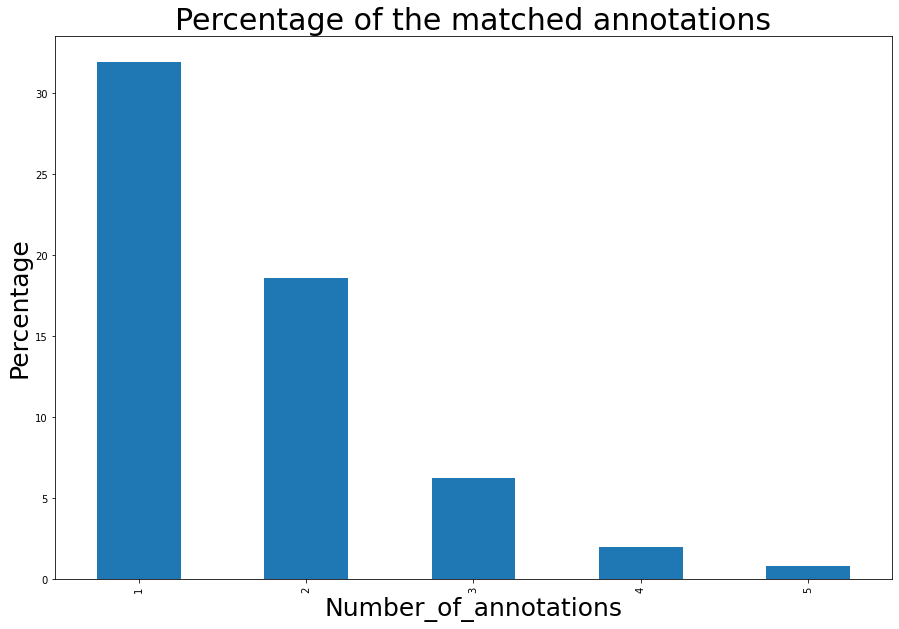

In [713]:
plot_with_pandas(Statistics_annots_per['percentage'],'bar',15,10,'Number_of_annotations',25, 'Percentage',25,'Percentage of the matched annotations',30)

In [569]:
Genes_names=[]
for i in range (0,len(Genes)):
    filtring=outcomes[outcomes['entrez-gene-id']==Genes[i]]
    Genes_names.append([Genes[i],len(filtring)])
Genes_names    

[['2137', 1],
 ['63925', 4],
 ['974', 1],
 ['10397', 1],
 ['6911', 2],
 ['63924', 1],
 ['51142', 1],
 ['3643', 3],
 ['25914', 3],
 ['2516', 7],
 ['85358', 2],
 ['3737', 5],
 ['50939', 2],
 ['1889', 1],
 ['4598', 5],
 ['5261', 1],
 ['57410', 1],
 ['259236', 1],
 ['23387', 1],
 ['4914', 1],
 ['631', 2],
 ['8604', 1],
 ['4998', 1],
 ['3909', 3],
 ['6878', 1],
 ['6904', 3],
 ['6578', 2],
 ['91179', 1],
 ['7170', 5],
 ['378884', 2],
 ['9895', 3],
 ['2799', 1],
 ['114034', 2],
 ['6499', 1],
 ['57465', 9],
 ['24', 4],
 ['5831', 2],
 ['2301', 2],
 ['10436', 1],
 ['57128', 1],
 ['5625', 2],
 ['57492', 2],
 ['5582', 1],
 ['56006', 2],
 ['5339', 6],
 ['5977', 2],
 ['84976', 6],
 ['487', 1],
 ['23529', 1],
 ['729238', 1],
 ['114548', 6],
 ['5052', 2],
 ['6144', 1],
 ['5449', 4],
 ['79577', 3],
 ['710', 5],
 ['387787', 2],
 ['6524', 3],
 ['2067', 3],
 ['23328', 2],
 ['3783', 1],
 ['57158', 2],
 ['51025', 1],
 ['57231', 3],
 ['2743', 1],
 ['84300', 1],
 ['1436', 5],
 ['79651', 1],
 ['10661', 2],
 ['

In [599]:
def plot_with_pandas(variable,kind,length,width,x_label,x_label_fs, y_label,y_label_fs,title,title_fs):
    
    plt.figure(figsize=(length,width))
# plot the data variable depending on the type of the plot such as bar or hist and so on
    variable.plot(kind=kind)
# set the title of the figure and its font size
    plt.title(title ,fontsize=title_fs)
# set the x_label for the figure 
    plt.xlabel(x_label, fontsize=x_label_fs)
# set the y_label for the figure 
    plt.ylabel(y_label , fontsize=y_label_fs)
    
    plt.show()



In [583]:
Genes_names_dataframe['No_of_annotated_HPO']

133    14
206    11
165     9
34      9
349     8
       ..
178     1
179     1
182     1
183     1
181     1
Name: No_of_annotated_HPO, Length: 362, dtype: int64

In [582]:
outcomes

,entrez-gene-id,entrez-gene-symbol,HPO-Term-ID,HPO-Term-Name,Frequency-Raw,Frequency-HPO,Additional Info from G-D source,G-D source,disease-ID for link,HP_prediction,index,prediction_score
0,2137,EXTL3,HP:0000007,Autosomal recessive inheritance,-,,-,mim2gene,OMIM:617425,HP:0000007,0,0.188488
1,63925,ZNF335,HP:0012444,Brain atrophy,-,HP:0040281,,orphadata,ORPHA:329228,HP:0012444,30,0.370051
2,63925,ZNF335,HP:0002171,Gliosis,-,,-,mim2gene,OMIM:615095,HP:0002171,41,0.304857
3,63925,ZNF335,HP:0002059,Cerebral atrophy,-,,-,mim2gene,OMIM:615095,HP:0002059,35,0.015312
4,63925,ZNF335,HP:0000007,Autosomal recessive inheritance,-,,-,mim2gene,OMIM:615095,HP:0000007,0,0.188488
...,...,...,...,...,...,...,...,...,...,...,...,...
777,284111,SLC13A5,HP:0012444,Brain atrophy,-,HP:0040283,,orphadata,ORPHA:3006,HP:0012444,30,0.370051
778,284111,SLC13A5,HP:0002500,Abnormal cerebral white matter morphology,-,,-,mim2gene,OMIM:615905,HP:0002500,32,0.998923
779,284111,SLC13A5,HP:0000007,Autosomal recessive inheritance,-,,-,mim2gene,OMIM:615905,HP:0000007,0,0.188488
780,284111,SLC13A5,HP:0001273,Abnormal corpus callosum morphology,-,HP:0040283,,orphadata,ORPHA:442835,HP:0001273,20,0.583308


In [449]:
Final_predss=pd.DataFrame()
for i in range (0,len(genes)):
    Final_predss=pd.concat([predictions_organs[predictions_organs['genes']== genes[i]],
              Final_predss],ignore_index=True)
Final_predss

,genes,hp_annotations,go_annotations,iea_annotations,deepgo_annotations,sequences,expressions,preds,hp_preds
0,2137,"{HP:0003312, HP:0000152, HP:0006505, HP:000437...","{GO:0036498, GO:0008152, GO:0034976, GO:004423...","{GO:0006029, GO:0050794, GO:0009059, GO:007088...","[GO:0000003|0.044, GO:0000139|0.115, GO:000027...",MTGYTMLRNGGAGNGGQTCMLRWSNRIRLTWLSFTLFVILVFFPLI...,"[0.5263158, 0.68421054, 0.47368422, 0.2631579,...","[0.18848795, 0.03743097, 0.14804411, 0.0560620...","{HP:0012443, HP:0011747, HP:0000870, HP:001276..."
1,63925,"{HP:0000152, HP:0000517, HP:0000277, HP:001273...","{GO:0043414, GO:0050794, GO:0010468, GO:005076...","{GO:0001067, GO:0061351, GO:0043414, GO:199083...","[GO:0000902|0.348, GO:0000976|0.265, GO:000097...",MEENEVESSSDAAPGPGRPEEPSESGLGVGTSEAVSADSSDAAAAP...,"[0.25714287, 0.2857143, 0.2, 0.6, 0.37142858, ...","[0.18848793, 0.037430964, 0.1480441, 0.0560620...","{HP:0012443, HP:0011747, HP:0000870, HP:001276..."
2,974,"{HP:0000152, HP:0012373, HP:0002090, HP:000040...","{GO:0044085, GO:0050794, GO:0007154, GO:003122...","{GO:0042113, GO:0060089, GO:0038023, GO:005079...","[GO:0002253|0.225, GO:0002376|0.731, GO:000242...",MARLALSPVPSHWMVALLLLLSAEPVPAARSEDRYRNPKGSACSRI...,"[0.0013953489, 0.0013953489, 0.0023255814, 0.8...","[0.18848795, 0.03743097, 0.14804411, 0.0560620...","{HP:0012443, HP:0011747, HP:0000870, HP:001276..."
3,10397,"{HP:0003383, HP:0001760, HP:0000005, HP:001237...","{GO:0050794, GO:0015631, GO:0070887, GO:003355...","{GO:0050794, GO:0015631, GO:0010256, GO:005080...","[GO:0000165|0.116, GO:0001655|0.048, GO:000166...",MSREMQDVDLAEVKPLVEKGETITGLLQEFDVQEQDIETLHGSVHV...,"[0.05740741, 0.087037034, 0.43333334, 0.009259...","[0.18848793, 0.03743097, 0.1480441, 0.05606205...","{HP:0012443, HP:0011747, HP:0000870, HP:001276..."
4,6911,"{HP:0003312, HP:0000175, HP:0000152, HP:000092...","{GO:0009653, GO:0005488, GO:0009888, GO:003250...","{GO:0001067, GO:1990837, GO:0001707, GO:005109...","[GO:0000122|0.176, GO:0000228|0.211, GO:000057...",MYHPRELYPSLGAGYRLGPAQPGADSSFPPALAEGYRYPELDTPKL...,"[0.083333336, 0.083333336, 0.16666667, 0.25, 0...","[0.1884879, 0.037430957, 0.14804408, 0.0560620...","{HP:0012443, HP:0011747, HP:0000870, HP:001276..."
...,...,...,...,...,...,...,...,...,...
357,8195,"{HP:0000175, HP:0000152, HP:0001374, HP:000913...","{GO:0051650, GO:0008104, GO:0070925, GO:000701...","{GO:0001707, GO:0007398, GO:0070925, GO:006063...","[GO:0000003|0.595, GO:0000226|0.861, GO:000110...",MSRLEAKKPSLCKSEPLTTERVRTTLSVLKRIVTSCYGPSGRLKQL...,"[0.5, 0.71428573, 0.39285713, 0.4642857, 0.428...","[0.18848793, 0.037430957, 0.1480441, 0.0560620...","{HP:0012443, HP:0011747, HP:0000870, HP:001276..."
358,7355,"{HP:0000152, HP:0012373, HP:0000570, HP:000028...","{GO:0072334, GO:0044431, GO:0008152, GO:009048...","{GO:0072334, GO:0044431, GO:0008152, GO:009048...","[GO:0000139|0.385, GO:0003674|0.645, GO:000521...",MAAVGAGGSTAAPGPGAVSAGALEPGTASAAHRRLKYISLAVLVVQ...,"[0.22580644, 0.29032257, 0.29032257, 0.6774193...","[0.18848802, 0.03743101, 0.14804421, 0.0560621...","{HP:0012443, HP:0011747, HP:0000870, HP:001276..."
359,8289,"{HP:0000175, HP:0000152, HP:0000517, HP:000052...","{GO:0006337, GO:0050794, GO:0010468, GO:007149...","{GO:0001890, GO:1901998, GO:0006337, GO:000170...","[GO:0000003|0.224, GO:0000075|0.011, GO:000007...",MAAQVAPAAASSLGNPPPPPPSELKKAEQQQREEAGGEAAAAAAAE...,"[0.2, 0.23076923, 0.24615385, 1.0, 0.41538462,...","[0.18848793, 0.037430957, 0.14804408, 0.056062...","{HP:0012443, HP:0011747, HP:0000870, HP:001276..."
360,7045,"{HP:0000517, HP:0000005, HP:0012373, HP:000047...","{GO:0044431, GO:0008152, GO:0044237, GO:005079...","{GO:0050794, GO:0098791, GO:0009888, GO:000557...","[GO:0001525|0.174, GO:0001568|0.174, GO:000194...",MALFVRLLALALALALGPAATLAGPAKSPYQLVLQHSRLRGRQHGP...,"[0.0024600246, 0.0012300123, 0.007380074, 0.00...","[0.18848795, 0.03743097, 0.14804412, 0.0560620...","{HP:0012443, HP:0011747, HP:0000870, HP:001276..."


In [466]:
HPO_Term_ID_10_2021=[]
inner_loop=[]
for i in range(0,len(Final_predss)):
    HP_per_gene=Final_predss['hp_preds'].iloc[i]
    for i in HP_per_gene:
        inner_loop.append(i)
    HPO_Term_ID_10_2021.append(inner_loop)

In [529]:
filtered_out=[]
HPO_common=[]
k=0
while k < len(HPO_Term_ID_10_2021):
#     print(k,'---------------')
    for i in range (0,len(HPO_Term_ID)):
        for j in range(len(HPO_Term_ID[i])):
#                 print(HPO_Term_ID[i][j])
                if HPO_Term_ID[i][j] in HPO_Term_ID_10_2021[k]:
#                     print('HPO_Term_ID[i][1]',HPO_Term_ID[i][j])
                    HPO_common.append(HPO_Term_ID[i][j])
        filtered_out.append([[result[i][0]],HPO_common])
        HPO_common=[]
            
    k+=1

In [ ]:
pd.DataFrame(filtered_out[0])

In [554]:
common_gene=[]
common_HPO=[]
for i in range (0,len(filtered_out)):
    if len(filtered_out[i][1])>0:
        common_gene.append(filtered_out[i][0])
        common_HPO.append(filtered_out[i][1])

In [557]:
New_HPO=pd.DataFrame()
New_HPO=pd.DataFrame(common_gene)

New_HPO['common_HPO']=common_HPO
New_HPO
New_HPO = New_HPO.rename(columns={0: 'common_gene'})
New_HPO=New_HPO[New_HPO['common_HPO']!='[]']
New_HPO

,common_gene,common_HPO
0,284111,"[HP:0012444, HP:0002500, HP:0001273, HP:0002059]"
1,8289,[HP:0001273]
2,7355,"[HP:0002059, HP:0002059, HP:0002418, HP:001276..."
3,8893,"[HP:0002352, HP:0002171]"
4,10342,[HP:0002171]
...,...,...
43073,4598,"[HP:0002120, HP:0002059]"
43074,3737,"[HP:0001273, HP:0001273, HP:0002059, HP:0002059]"
43075,2516,"[HP:0008232, HP:0008232, HP:0008232, HP:000083..."
43076,25914,"[HP:0006870, HP:0002059]"
